In [3322]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

In [3323]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3324]:
#reading the dataframe
df = pd.read_csv("train.csv")

In [3325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

using the Data Dictionary we will evaluate the column data type and if there is any missmatch then we will correct all of them

In [3326]:
#selecting all the columns of int64 type
int64_columns = list(df.select_dtypes(include=['int64']).columns)
print("columns with data type INT 64 = " , int64_columns)
print('\n')
#selecting all the columns of float64 type
float64_columns = list(df.select_dtypes(include=['float64']).columns)
print("columns with data type INT 64 = " , float64_columns)

columns with data type INT 64 =  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


columns with data type INT 64 =  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


after comparing the int, float data types it is found out that the columns `MSSubClass` , `OverallQual` , `OverallCond` 
are of type int but they are having a categorical data representation in the data dictionary. 
so mapping them to their string datatype so that creating the dummies is easy.

In [3327]:
#changinf the datatype of the columns
df = df.astype({'MSSubClass' : 'str' , 'OverallQual' : 'str' , 'OverallCond' : 'str' , 'MoSold' : 'str'})

In [3328]:
#getting the percentage of missing values in each column
dummy_df = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
dummy_df = dummy_df.rename(columns = {0:"percentage_missing"} )

#extracting the column names with non zero missing values
dummy_df = dummy_df[dummy_df.percentage_missing != 0]
print(dummy_df)

#storing the columns with non zero missing values in a list
non_zero_missing_column_list = list(dummy_df.index)
print(non_zero_missing_column_list)

              percentage_missing
LotFrontage                17.74
Alley                      93.77
MasVnrType                  0.55
MasVnrArea                  0.55
BsmtQual                    2.53
BsmtCond                    2.53
BsmtExposure                2.60
BsmtFinType1                2.53
BsmtFinType2                2.60
Electrical                  0.07
FireplaceQu                47.26
GarageType                  5.55
GarageYrBlt                 5.55
GarageFinish                5.55
GarageQual                  5.55
GarageCond                  5.55
PoolQC                     99.52
Fence                      80.75
MiscFeature                96.30
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [3329]:
#imputing the columns LotFrontage 
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

#imputing the column Electrical
print(df.Electrical.value_counts())
df.Electrical  = df.Electrical.fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [3330]:
#imputing the columns MasVnrType
print(df.MasVnrType.value_counts())
df.MasVnrType = df.MasVnrType.fillna('None')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


from the data dictionary we know that the colums MasVnrType and MasVnrArea are related.As we imputed the column MasVnrType with 'None'. so the column MasVnrArea with the missing values should be imputed with 0.

In [3331]:
#imputing the column MasVnrArea
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [3332]:
#imputing the columns GarageArea and GarageCars with 0 as these are not available for the houses with no garrage
df.GarageArea = df.GarageArea.fillna(0)
df.GarageCars = df.GarageCars.fillna(0)

In [3333]:
#removinng the rows where the column GarageYrBlt is not available
df = df.loc[~df.GarageYrBlt.isnull()]

i have removed the rows with the GarageYrBlt because i cannot impute this column
if there is no garrage then the value for GarageYrBlt is not available, if i impute with mean, mode, meidan or even with zero then i will be inducing error in the Data. so i choose to remove this

Eventhough we can see that there are colums with missing values, we cannot simply impute them or remove the colums  because the missing values have some meaning, the columns filled mith NA have a meaning, this can be found in the data dictionary 

# Data Preperation

I am creating the dummy variables for all the columns of type object

In [3334]:
#selecting all the columns of object type
object_columns = list(df.select_dtypes(include=['object']).columns)

In [3335]:
print(object_columns)
df.shape

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


(1379, 81)

In [3336]:
#creating dummies
status = pd.get_dummies(df[object_columns])

df = pd.concat([df, status], axis = 1)

In [3337]:
#droping the original columns for which dummies are created from the DF 
df = df.drop(columns =object_columns)

In [3338]:
print(df.columns.values)

['Id' 'LotFrontage' 'LotArea' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'YrSold'
 'SalePrice' 'MSSubClass_120' 'MSSubClass_160' 'MSSubClass_180'
 'MSSubClass_190' 'MSSubClass_20' 'MSSubClass_30' 'MSSubClass_40'
 'MSSubClass_45' 'MSSubClass_50' 'MSSubClass_60' 'MSSubClass_70'
 'MSSubClass_75' 'MSSubClass_80' 'MSSubClass_85' 'MSSubClass_90'
 'MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM' 'Street_Grvl' 'Street_Pave' 'Alley_Grvl' 'Alley_Pave'
 'LotShape_IR1' 'LotShape_IR2' 'LotShape_IR3' 'LotShape_Reg'
 'LandContour_Bnk' 'LandContour_HLS' 'LandContour_Low' 'LandContour_Lvl'
 'Utilities_AllPub' 'Utilities_NoSeWa' 'LotConfig_

after doing all the cleaning and preporatory steps in data analysis, again checking for the missing values in any column

In [3339]:
#getting the percentage of missing values in each column
dummy_df = pd.DataFrame(round(100*df.isnull().sum()/len(df.index),2))
dummy_df = dummy_df.rename(columns = {0:"percentage_missing"} )

#extracting the column names with non zero missing values
dummy_df = dummy_df[dummy_df.percentage_missing != 0]
print(dummy_df)

Empty DataFrame
Columns: [percentage_missing]
Index: []


since there are no missing values, the Data frame is clean

### Feature Engineering

from the data dictionary it is clear that the columns `YearBuilt` and `YearRemodAdd` carry the same information.
the column `YearRemodAdd` can compeltely explain the column `YearBuilt`. so i decide to drop the column `YearBuilt`

In [3340]:
#droping the column YearBuilt
df.drop('YearBuilt' , axis = 'columns' , inplace = True)

new feature called age of house which is the difference between yearsold and YearRemodAdd this can give more information as it is a derived feature

In [3341]:
#adding a new feature called age of house which is the difference between yearsold and YearRemodAdd
df['age_of_house'] = df['YearRemodAdd'] - df['YrSold']

In [3342]:
#removing the columns YearRemodAdd and YrSold
df.drop('YearRemodAdd' , axis = 'columns' , inplace = True)
df.drop('YrSold' , axis = 'columns' , inplace = True)

## Splitting the Data into Training and Testing Sets and building the model



In [3343]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train , df_test = train_test_split(df, train_size = 0.7 , test_size = 0.3 , random_state = 100)

In [3344]:
#importing the scaling library

from sklearn.preprocessing import MinMaxScaler

In [3345]:
#dividing into X and y sets for model building for Train data

y_train = df_train.pop('SalePrice').values.reshape(-1,1)
X_train = df_train

In [3346]:
#dividing into X and y sets for model building for Test data

y_test = df_test.pop('SalePrice').values.reshape(-1,1)
X_test = df_test

In [3347]:
#creating a scaler object, fit and transform the train data
Min_Max_Scaler = MinMaxScaler()
X_train_scaled = Min_Max_Scaler.fit_transform(X_train)
y_train_scaled = Min_Max_Scaler.fit_transform(y_train)

In [3348]:
#creating a scaler object, transform the test data

X_test_scaled = Min_Max_Scaler.transform(X_test)
y_test_scaled = Min_Max_Scaler.transform(y_test)

In [3349]:
#printing the shape of the train and test data
print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

(965, 325)
(965, 1)
(414, 325)
(414, 1)


In [3350]:
#importing all the necessary library

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV



# Ridge Regression

### Parameter Tuning

In [3351]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train_scaled) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3352]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
#storing the best value in a variable
best_alpha = model_cv.best_params_['alpha']

{'alpha': 10.0}


### Model Fit and Predict

In [3353]:
#Fitting Ridge model for best_alpha and printing coefficients which have been penalised
ridge = Ridge(alpha=best_alpha)

ridge.fit(X_train_scaled, y_train_scaled)
print(ridge.coef_)

[[-1.26649882e-03 -9.64730743e-04  1.80571897e-02  2.54496474e-02
   1.57717917e-02  1.10074291e-02  5.78483439e-03  1.94360583e-02
   3.80957667e-02  4.71434284e-02  1.70248648e-03  5.00354330e-02
   1.43653852e-02  4.13558996e-03  4.17488077e-02  1.35026189e-02
   3.41085738e-03 -8.62241094e-03  4.51113934e-02  2.44849230e-02
  -5.33888267e-03  4.54449959e-02  1.95444123e-02  1.17365276e-02
   1.37651424e-02 -2.66459333e-03  8.03540948e-03  1.09227686e-02
   1.00107414e-02  1.65521825e-03 -1.63875135e-03 -5.93222212e-03
  -4.36988812e-03  7.83677140e-04  6.22714126e-03 -5.03962999e-03
   3.21497756e-03  1.45914863e-03  2.56573872e-03 -3.51091735e-03
   1.07619825e-02  4.63529066e-03 -6.33193065e-04 -7.23809125e-03
  -1.28526324e-03 -1.41891430e-02  5.56942408e-03  1.84569828e-03
   8.90154848e-03 -2.12752788e-03 -6.50045649e-03  6.50045649e-03
   6.18997816e-04  5.13176192e-03  2.64790085e-04  1.17406795e-02
  -8.42995365e-03 -3.57551590e-03 -7.35709102e-03  2.17054684e-03
   1.90829

In [3354]:
#predict on the created model and finding the R Squared value for train data
y_train_pred = ridge.predict(X_train_scaled)
print("r2 score train = " + str(r2_score(y_train_scaled, y_train_pred)))

r2 score train = 0.9022967078850114


Text(0.5, 0, 'Errors')

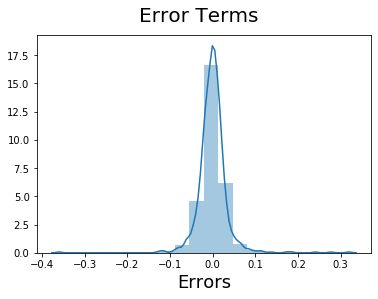

In [3355]:
#calculating the error on training data
error_train = y_train_scaled - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_train, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

In [3356]:
#predict on the created model and finding the R Squared value for test data
y_test_pred = ridge.predict(X_test_scaled)
print("r2 score test= " + str(r2_score(y_test_scaled, y_test_pred)))

r2 score test= -2.3793035934315405


Text(0.5, 0, 'Errors')

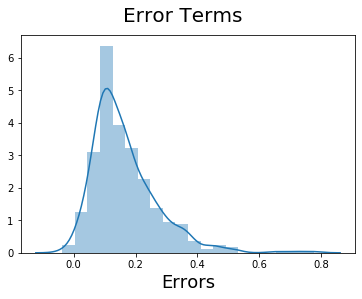

In [3357]:
#calculating the error on testing data

error_test = y_test_scaled - y_test_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_test, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

# Lasso Regression

In [3358]:
#creation of lasso regression object
lasso = Lasso()
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_scaled, y_train_scaled) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3359]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
best_alpha = model_cv.best_params_['alpha']

{'alpha': 0.0001}


In [3360]:
#Fitting Ridge model for best_alpha and printing coefficients which have been penalised

lasso = Lasso(alpha=best_alpha)
        
lasso.fit(X_train_scaled, y_train_scaled) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [3361]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  6.60571412e-02,  2.09454712e-02,
        9.29149744e-02,  1.45658714e-02, -0.00000000e+00,  6.45288999e-02,
        0.00000000e+00,  0.00000000e+00, -1.40056211e-02,  3.81308784e-01,
        7.58073154e-03,  4.57610418e-04,  1.63355962e-02,  5.48043627e-03,
       -1.11977440e-02, -1.94149035e-02,  7.24748960e-03,  1.53212374e-02,
        0.00000000e+00,  4.16971060e-02,  0.00000000e+00,  6.31185795e-03,
        1.51863912e-02, -2.50579048e-04,  3.73649367e-03,  6.38223454e-03,
        5.22048450e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.08551679e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.85450901e-04, -1.25610032e-02,  1.68302688e-03, -1.78394515e-03,
       -0.00000000e+00, -1.24158127e-02,  0.00000000e+00,  0.00000000e+00,
        6.55282900e-03, -3.86284149e-03, -5.34722682e-03,  0.00000000e+00,
       -0.00000000e+00,  

In [3362]:
#predict on the created model and finding the R Squared value for train data
y_train_pred_lasso = lasso.predict(X_train_scaled)
print("r2 score = " + str(r2_score(y_train_scaled, y_train_pred_lasso)))

r2 score = 0.9410744923994214


Text(0.5, 0, 'Errors')

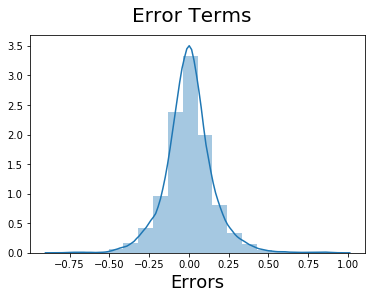

In [3363]:
#calculating the error on training data
error_train = y_train_scaled - y_train_pred_lasso
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_train, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

In [3364]:
#predict on the created model and finding the R Squared value for test data
y_test_pred_lasso = lasso.predict(X_test_scaled)
print("r2 score = " + str(r2_score(y_test_scaled, y_test_pred_lasso)))

r2 score = -5.4366984902059645


Text(0.5, 0, 'Errors')

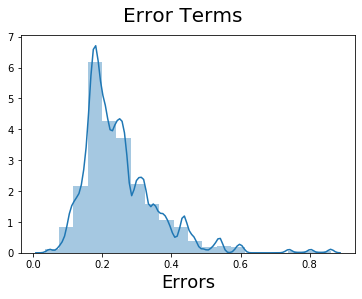

In [3365]:
#calculating the error on testing data
error_test = y_test_scaled - y_test_pred_lasso
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_test, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

from the above computed models it is clear that the r2 value is very high on the training data and the r2 value is verry less for the testing data. clearly this indicates `OVERFITTING` . Also the error tearms are not uniformly distributed and not centered at zero

the cause of overfitting is because the model became too complex because of the number of predictor variables, to avoid it i use RFE and remove some features

# RFE

number of features that are to be considerred, i gave as input, i consider number of features as 50, to reduce the model beeing too complex

In [3366]:
#storing the number of features considered in a variable
number_of_features_considered = 50

In [3367]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, number_of_features_considered)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train.columns[rfe.support_]
col 

Index(['Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Heating_OthW', 'Heating_Wall', 'HeatingQC_Ex', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N',
       'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_SBrkr', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj1',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Typ', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'SaleCondition_Abnorml', 'Sa

In [3368]:
#selecting only the columns that RFE suggested in both testing and training datasets
X_rfe_train = df_train[col]
X_rfe_test = df_test[col]
X_rfe_train_scaled = Min_Max_Scaler.fit_transform(X_rfe_train)
X_rfe_test_scaled = Min_Max_Scaler.fit_transform(X_rfe_test)

# Lasso after RFE

In [3369]:
#Applying regularization after the RFE
lasso = Lasso()
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_rfe_train_scaled, y_train_scaled) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3370]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
best_alpha = model_cv.best_params_['alpha']

{'alpha': 0.0001}


In [3371]:
#Fitting Ridge model for best_alpha and printing coefficients which have been penalised

lasso = Lasso(alpha=best_alpha)
        
lasso.fit(X_rfe_train_scaled, y_train_scaled) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [3372]:
lasso.coef_

array([ 0.00000000e+00, -1.49214217e-02,  1.16173521e-02, -3.75555223e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        7.17272067e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.61747863e-02,  2.41856234e-04, -7.04151598e-03, -0.00000000e+00,
       -0.00000000e+00, -2.52713422e-02,  4.94902632e-18, -3.98583477e-03,
       -0.00000000e+00,  0.00000000e+00,  1.22743935e-02,  1.87544254e-01,
       -2.24216548e-02,  3.65509005e-02, -5.63975662e-03, -2.79225911e-02,
       -0.00000000e+00,  0.00000000e+00, -5.15919529e-04,  1.78087810e-02,
        9.25664387e-04,  0.00000000e+00,  1.31884300e-02, -0.00000000e+00,
        2.70780080e-02, -0.00000000e+00, -2.63361987e-02,  2.10034810e-02,
       -0.00000000e+00, -1.23479388e-02,  1.49105396e-01, -4.05778073e-02,
        1.13475232e-02,  0.00000000e+00, -2.51738676e-02, -4.36362229e-02,
       -4.44455553e-02, -2.04337142e-02])

In [3373]:
#predict on the created model and finding the R Squared value for training data
y_train_pred_lasso = lasso.predict(X_rfe_train_scaled)
print("r2 score = " + str(r2_score(y_train_scaled, y_train_pred_lasso)))

r2 score = 0.590402014171689


Text(0.5, 0, 'Errors')

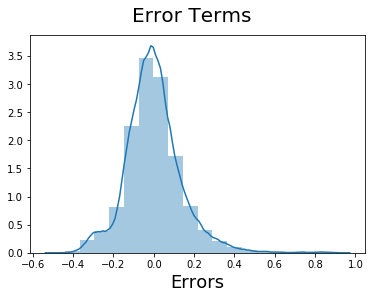

In [3374]:
#calculating the error on training data
error_train = y_train_scaled - y_train_pred_lasso
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_train, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

In [3375]:
#predict on the created model and finding the R Squared value for test data
y_test_pred_lasso = lasso.predict(X_rfe_test_scaled)
print("r2 score = " + str(r2_score(y_test_scaled, y_test_pred_lasso)))

r2 score = 0.48323944701138766


Text(0.5, 0, 'Errors')

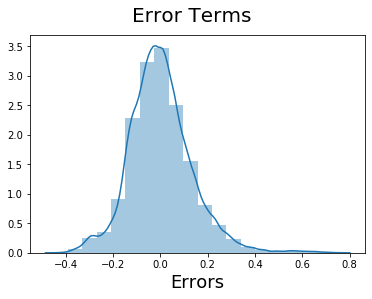

In [3376]:
#calculating the error on testing data
error_test = y_test_scaled - y_test_pred_lasso
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_test, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

# Ridged after RFE

In [3377]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_rfe_train_scaled, y_train_scaled) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3378]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
best_alpha = model_cv.best_params_['alpha']

{'alpha': 4.0}


In [3379]:
#Fitting Ridge model for best_alpha  and printing coefficients which have been penalised

ridge = Ridge(alpha=best_alpha)

ridge.fit(X_rfe_train_scaled, y_train_scaled)
print(ridge.coef_)

[[ 7.15927304e-03 -9.22340271e-03  1.77023364e-02 -2.99720402e-02
   3.57976587e-03  1.07540676e-02 -1.07511846e-02 -1.95792528e-02
   4.28128705e-02 -1.72351214e-02  4.01512621e-03  7.37562061e-04
   1.41187187e-02  4.52420163e-05 -1.03512132e-02 -3.40943002e-04
  -3.47180454e-03 -1.48219110e-02  1.48219110e-02 -7.00263727e-03
  -5.24790718e-03  1.70228370e-03  1.05482607e-02  1.31435375e-01
  -6.14963218e-02 -1.43494808e-02 -5.55895721e-02 -2.38724032e-02
  -1.02443005e-02  6.32293603e-03 -7.16278160e-04  2.29467112e-02
   5.56333468e-03  4.13434179e-03  1.20732975e-02 -3.96414164e-03
   2.64957959e-02 -1.13056404e-02 -2.74336531e-02  1.85815776e-02
  -3.06946704e-03 -1.55121106e-02  4.99524229e-02 -3.92189977e-02
   1.53177801e-02 -1.36260686e-03 -2.46885986e-02 -4.14301367e-02
  -4.05741636e-02 -2.00491906e-02]]


In [3380]:
#predict on the created model and finding the R Squared value for training data
y_train_pred_ridge = ridge.predict(X_rfe_train_scaled)
print("r2 score = " + str(r2_score(y_train_scaled, y_train_pred_ridge)))

r2 score = 0.5875536062578522


Text(0.5, 0, 'Errors')

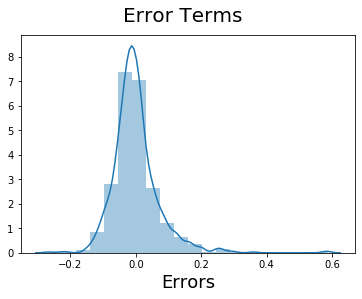

In [3381]:
#calculating the error on training data
error_train = y_train_scaled - y_train_pred_ridge
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_train, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

In [3382]:
#predict on the created model and finding the R Squared value for test data
y_test_pred_ridge = ridge.predict(X_rfe_test_scaled)
print("r2 score = " + str(r2_score(y_test_scaled, y_test_pred_ridge)))

r2 score = 0.499857840499755


Text(0.5, 0, 'Errors')

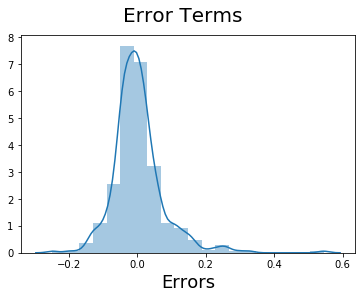

In [3383]:
#calculating the error on testing data
error_test = y_test_scaled - y_test_pred_ridge
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_test, bins = 20)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
# X-label
plt.xlabel('Errors', fontsize = 18)    

After removing more features by using RFE and then applying the regularization it is clear tha the error between testing and training is less and also the distribution of error terms is normal, centered arround zero